In [24]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
%matplotlib inline

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [12]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [21]:
mnist.target.shape

(70000,)

In [22]:
data=mnist.data

In [14]:
target=mnist.target

In [16]:
target=[target=='5']

In [20]:
len(target[0])

70000

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, target[0], test_size=0.25)

In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(52500, 784) (17500, 784) (52500,) (17500,)


In [27]:
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [28]:
prediction = svm_classifier.predict(X_test)

In [29]:
prediction

array([False, False, False, ..., False, False, False])

In [30]:
from sklearn.metrics import accuracy_score

print("Accuracy - {}".format(accuracy_score(y_pred=prediction, y_true=y_test)))

Accuracy - 0.9952


In [44]:
import numpy as np
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score


precision_scores = []
recall_scores = []

precision_scores.append(precision_score(y_test, prediction, average='micro'))
recall_scores.append(recall_score(y_test, prediction, average='micro'))

print(precision_scores)
print("Recall: %0.2f (+/- %0.2f)" % (np.mean(precision_scores), np.std(precision_scores) * 2))
print(recall_scores)
print("Recall: %0.2f (+/- %0.2f)" % (np.mean(recall_scores), np.std(recall_scores) * 2))

[0.9952]
Recall: 1.00 (+/- 0.00)
[0.9952]
Recall: 1.00 (+/- 0.00)


In [45]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, prediction, average='macro')


(0.9931547378040901, 0.977110592101189, 0.9849684269477207, None)

In [56]:
precision=precision_score(y_test, prediction, average='macro')
print(f"precision: {precision }")

precision: 0.9931547378040901


In [57]:
recall=recall_score(y_test, prediction, average='macro')
print(f"recall: {recall }")

recall: 0.977110592101189


In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
cm

array([[15927,    14],
       [   70,  1489]], dtype=int64)

<AxesSubplot:>

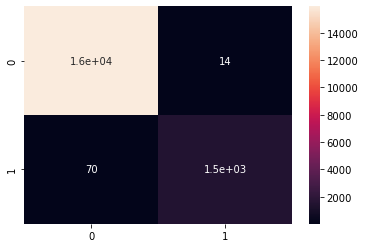

In [42]:
sns.heatmap(cm, annot=True)

False
False
False
False
False
False
False
False
False
False


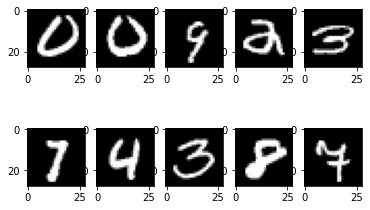

In [31]:
fig, axs = plt.subplots(2, 5)
for i in range(10):
    array = X_test[i].reshape(28, 28)
    array.shape
    if i < 5:
        axs[0, i].imshow(array, cmap="gray")
        print(prediction[i])
    else:
        axs[1, i - 5].imshow(array, cmap="gray")
        print(prediction[i])

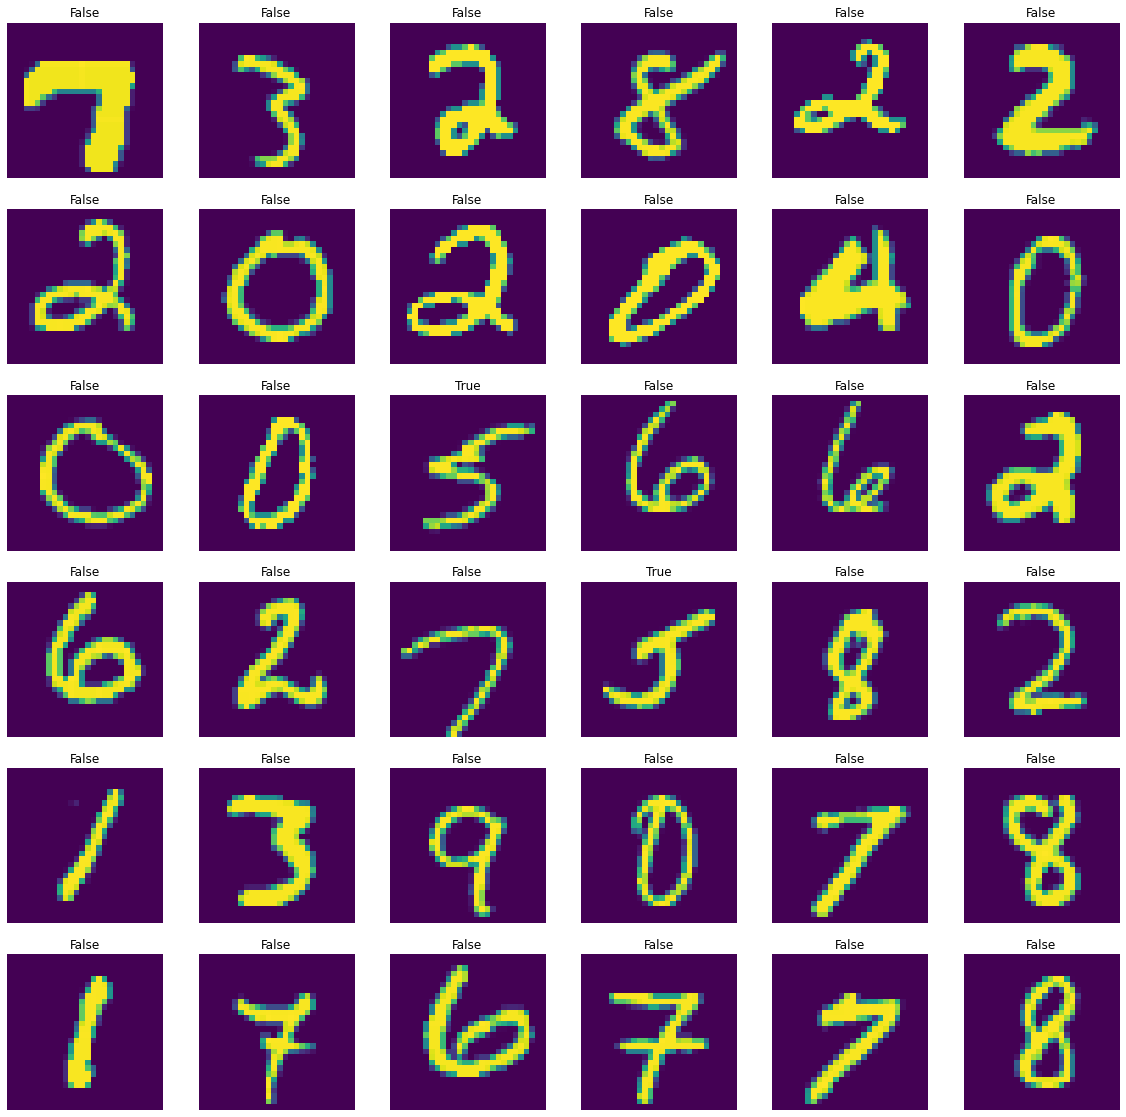

In [37]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i].reshape(28, 28))    
    plt.axis('off')
    plt.title(prediction[i])